In [1]:
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [19]:
# create time series as first Barret example

np.random.seed(100)
time = np.arange(0,5,0.01)

alpha = 0.2
beta = 0.5
data = np.zeros((2,len(time)))

for i in range(1,len(time)):
    data[0,i] = alpha*data[1,i-1] + beta*data[0,i-1] + np.random.normal()
    data[1,i] = np.random.normal()

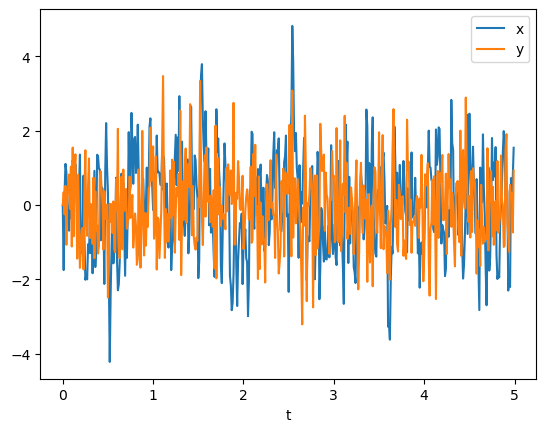

In [20]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [21]:
# slice for PID

Y = data[0,:-1]
Z = data[1,:-1]
X = data[:,1:]

In [22]:

def I_XY(X,Y):
    
    dim_X = X.ndim
    dim_Y = Y.ndim
    
    cov = np.cov(X,Y)
    if (dim_X == 1):
        det_sigma_X = cov[0,0]
    elif (dim_X > 1):
        det_sigma_X = np.linalg.det(cov[:dim_X,:dim_X])
    if (dim_Y == 1):
        det_sigma_Y = cov[dim_X,dim_X]
    elif (dim_Y > 1):
        det_sigma_Y = np.linalg.det(cov[dim_X:,dim_X:])
        
    I = np.log2((det_sigma_X*det_sigma_Y)/np.linalg.det(cov))
    
    return I

def I_XYZ(X,Y,Z):
    
    dim_X = X.ndim
    dim_Y = Y.ndim
    dim_Z = Z.ndim
    
    cov = np.cov(np.vstack((X,Y,Z)))
    if (dim_X == 1):
        det_sigma_X = cov[0,0]
    elif (dim_X > 1):
        det_sigma_X = np.linalg.det(cov[:dim_X,:dim_X])
    det_sigma_YZ = np.linalg.det(cov[dim_X:,dim_X:])
        
    I = np.log2((det_sigma_X*det_sigma_YZ)/np.linalg.det(cov))
    
    return I

def PID_2(X,Y,Z):
    
    I_xy = I_XY(X,Y)
    I_xz = I_XY(X,Z)
    I_xyz = I_XYZ(X,Y,Z)
    
    R = min(I_xy,I_xz)
    
    if R == I_xy:
        Uy = 0
        Uz = I_xz - I_xy
        S = I_xyz - I_xz   
    else:
        Uz = 0
        Uy = I_xy - I_xz
        S = I_xyz - I_xy
        
    return Uy, Uz, S, R

In [23]:
Uy, Uz, S, R = PID_2(X,Y,Z)
TDMI = Uy + Uz + S + R
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)
print("TDMI:",TDMI)

Uy: 0.5035171599276294
Uz: 0
S: 0.07355594187225611
R 0.03924674353197384
TDMI: 0.6163198453318594
